In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import calendar

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
#-----------------------------------------------------
def filter(array):
    priceUSD, usdM2, surfaceTotal = array
    if np.isnan(surfaceTotal) or surfaceTotal == 0:
        return np.nan
    if not np.isnan(priceUSD) and not np.isnan(usdM2):
        price = usdM2 * surfaceTotal
        dif = abs(price - priceUSD)
        if (dif/priceUSD)*100 <= 10:
            return 1
    return 1
#-----------------------------------------------------
def fillPrice(array):
    priceUSD, usdM2, surfaceTotal = array
    if np.isnan(priceUSD) and not np.isnan(usdM2):
        return usdM2*surfaceTotal
    return priceUSD
#-----------------------------------------------------
def fillM2(array):
    priceUSD, usdM2, surfaceTotal = array
    if not np.isnan(priceUSD) and np.isnan(usdM2):
        return priceUSD/surfaceTotal
    return usdM2
#-----------------------------------------------------

In [5]:
"""miPath = "./properties/"
for archive in listdir(miPath):
    if ".csv" in archive:
        df = pd.read_csv(miPath+archive, low_memory=False)
        if 'properati_url' in df:
            df.drop('properati_url', axis = 1, inplace = True)
        if 'geonames_id' in df:
            df.drop('geonames_id', axis = 1, inplace = True)
        if 'description' in df:
            df.drop('description', axis = 1, inplace = True)
        if 'image_thumbnail' in df:
            df.drop('image_thumbnail', axis = 1, inplace = True)
        if 'operation' in df:
            df.drop('operation', axis = 1, inplace = True)
        if 'price_aprox_usd' not in df:
            df.rename(columns={'price': 'price_aprox_usd'}, inplace=True)
        if 'surface_total_in_m2' not in df:
            df.rename(columns={'surface_in_m2': 'surface_total_in_m2'}, inplace=True)
        
        df.loc[:, 'price_aprox_usd'] = df.loc[:, ['price_aprox_usd']].apply(lambda x: float(x), axis=1)
        df.loc[:, 'price_usd_per_m2'] = df.loc[:, ['price_usd_per_m2']].apply(lambda x: float(x), axis=1)
        
        df['filter'] = df.loc[:, ['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2']].apply(filter, axis=1)
        df = df[~np.isnan(df['filter'])]
        df.loc[:, ['price_aprox_usd']] = df.loc[:, ['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2']].apply(fillPrice, axis=1)
        df.loc[:, ['price_usd_per_m2']] = df.loc[:, ['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2']].apply(fillM2, axis=1)
        df.drop('filter', axis = 1, inplace = True)
        
        if len(df.index) != 0:
            print("DSP", archive)
            df.to_csv(archive, index=True, header=True, sep=',', encoding='utf-8-sig')"""

'miPath = "./properties/"\nfor archive in listdir(miPath):\n    if ".csv" in archive:\n        df = pd.read_csv(miPath+archive, low_memory=False)\n        if \'properati_url\' in df:\n            df.drop(\'properati_url\', axis = 1, inplace = True)\n        if \'geonames_id\' in df:\n            df.drop(\'geonames_id\', axis = 1, inplace = True)\n        if \'description\' in df:\n            df.drop(\'description\', axis = 1, inplace = True)\n        if \'image_thumbnail\' in df:\n            df.drop(\'image_thumbnail\', axis = 1, inplace = True)\n        if \'operation\' in df:\n            df.drop(\'operation\', axis = 1, inplace = True)\n        if \'price_aprox_usd\' not in df:\n            df.rename(columns={\'price\': \'price_aprox_usd\'}, inplace=True)\n        if \'surface_total_in_m2\' not in df:\n            df.rename(columns={\'surface_in_m2\': \'surface_total_in_m2\'}, inplace=True)\n        \n        df.loc[:, \'price_aprox_usd\'] = df.loc[:, [\'price_aprox_usd\']].apply(

In [6]:
properties = []
for archive in listdir("."):
    if ".csv" in archive:
        df = pd.read_csv(archive, low_memory=False)
        month = archive.split('-')[3]
        year = archive.split('-')[2]
        date = year + '-' + month
        size = len(df.index)
        dates = pd.Series([date for i in range(0, size)])
        df['date'] = dates
        df.loc[:, ['date']] = pd.to_datetime(df['date'], errors='coerce')
        df.loc[:, ['created_on']] = pd.to_datetime(df['created_on'], errors='coerce')
        properties.insert(-1, df)

Discretizo cada DataFrame segun si es Capital Federal o no

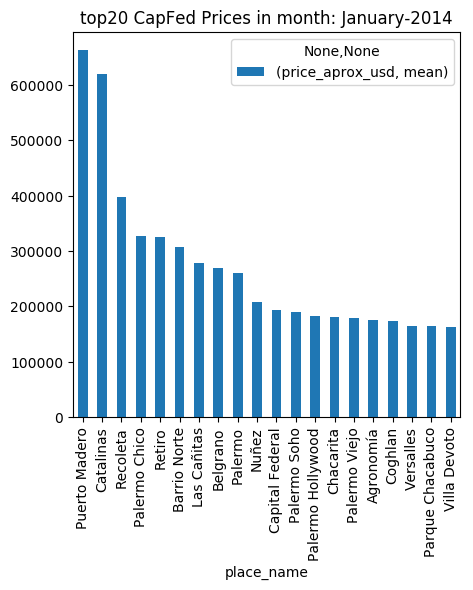

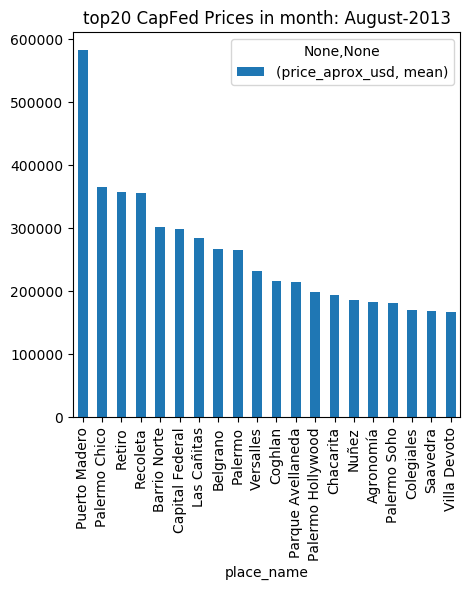

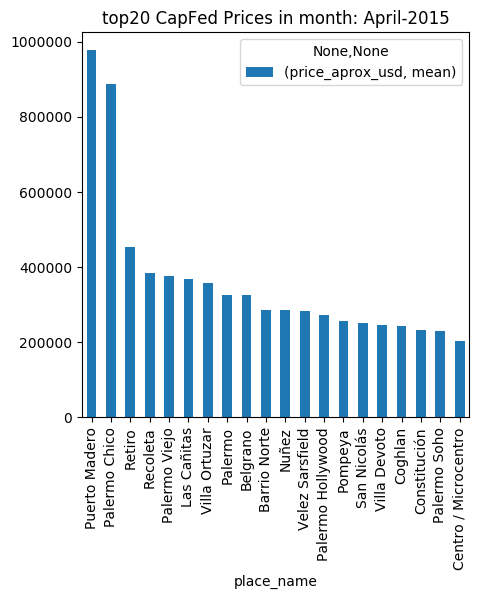

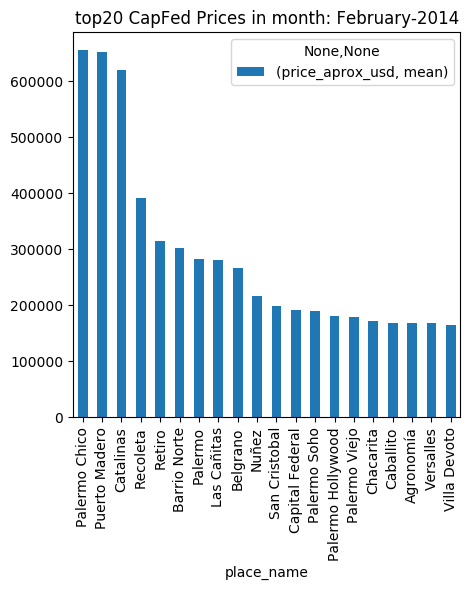

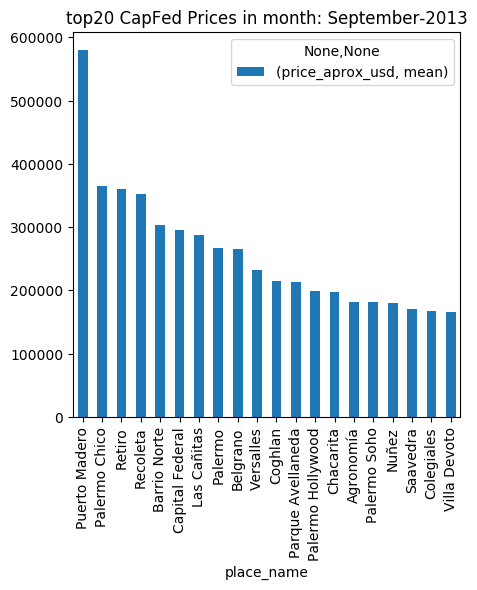

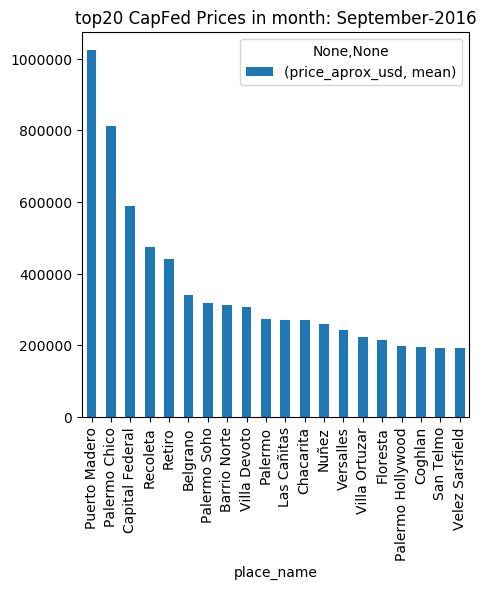

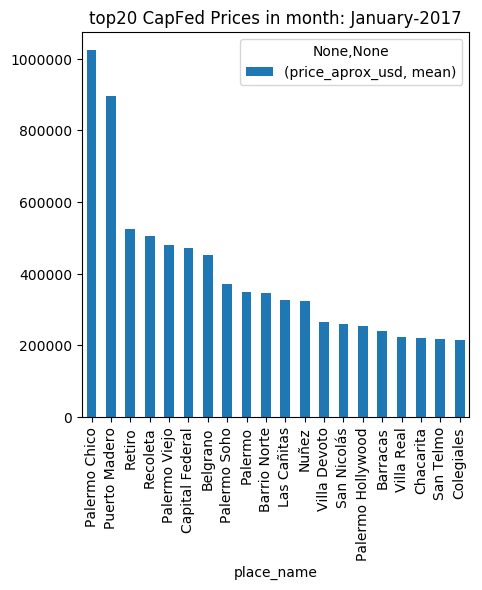

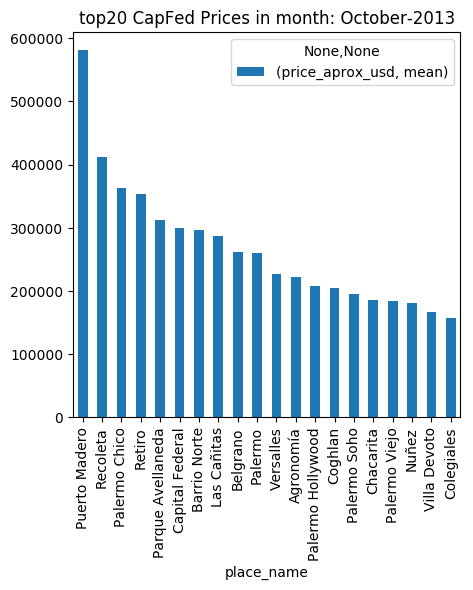

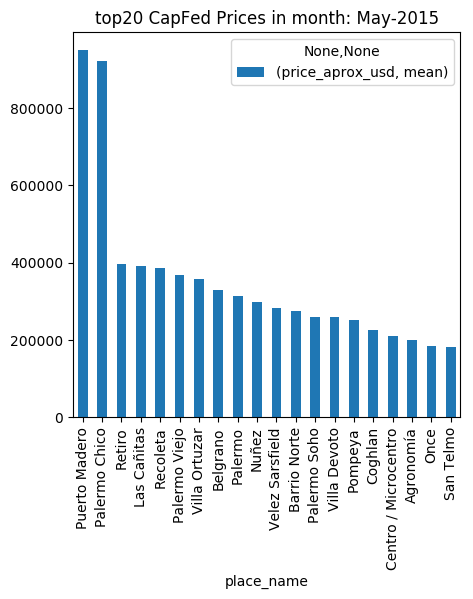

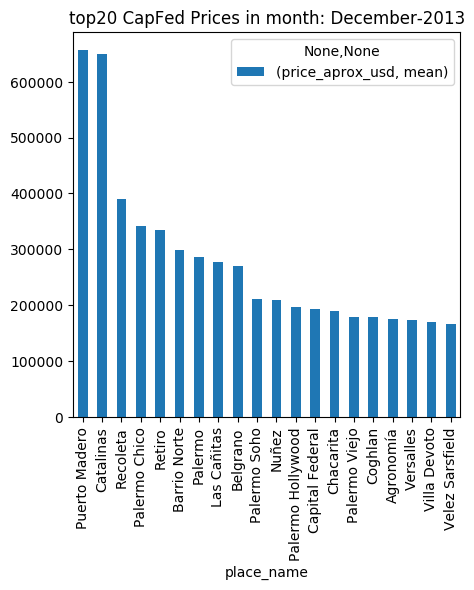

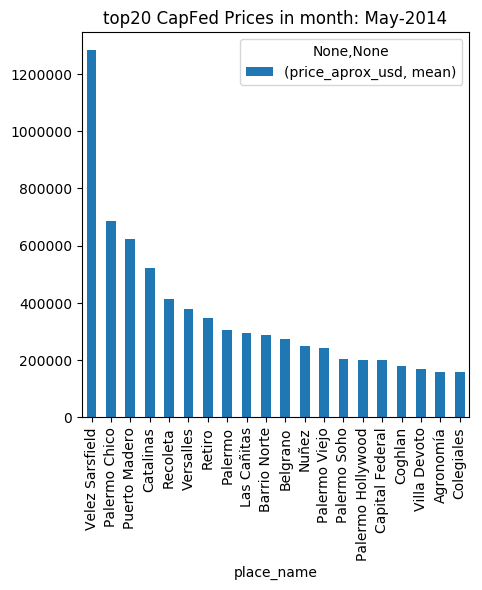

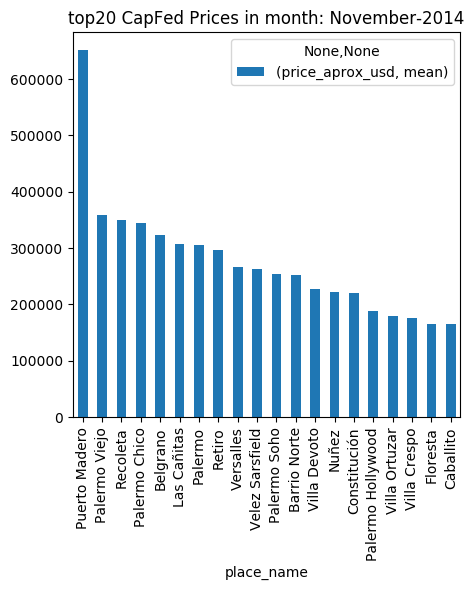

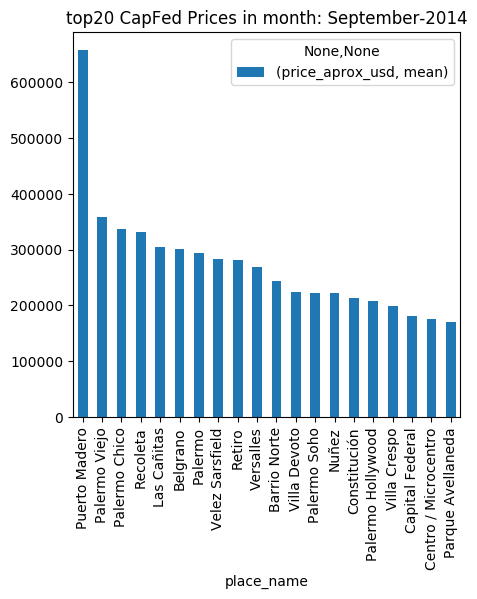

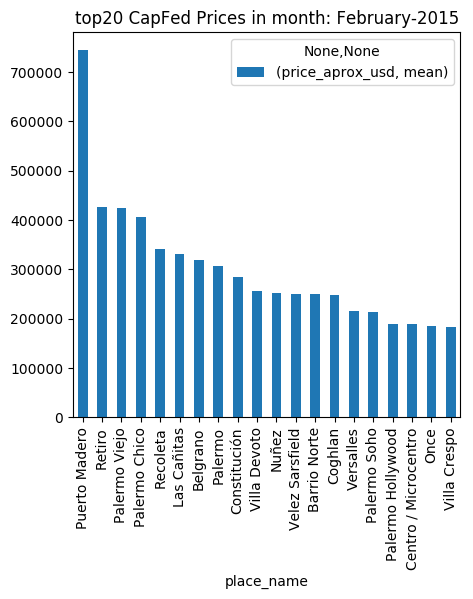

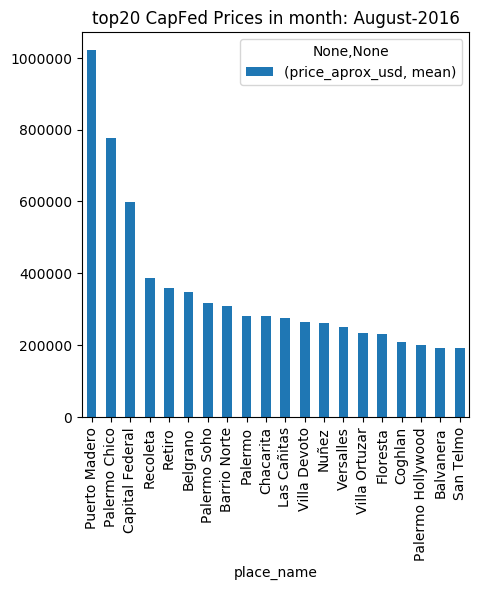

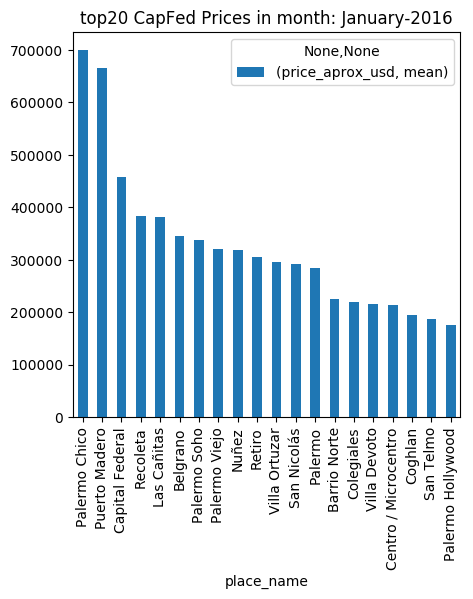

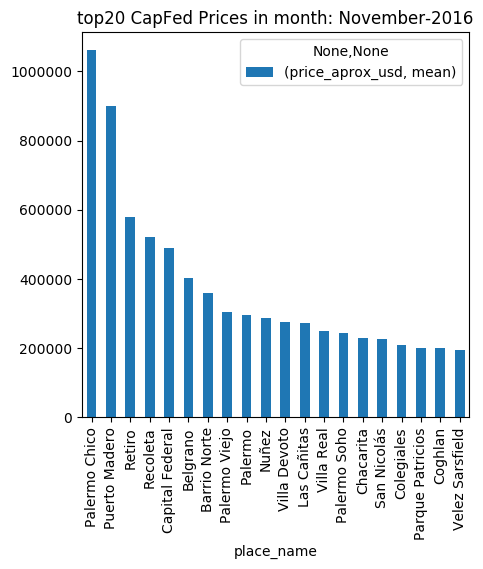

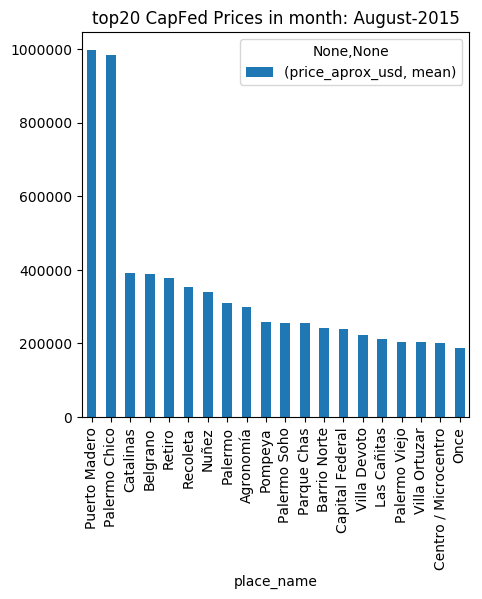

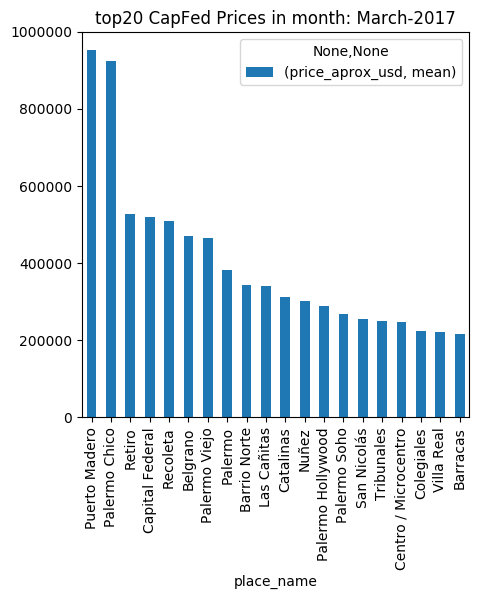

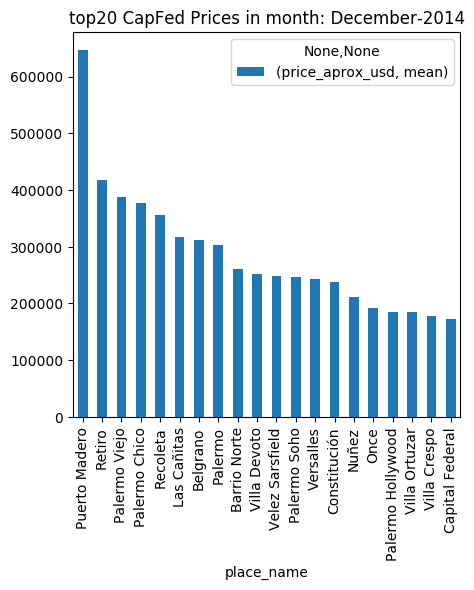

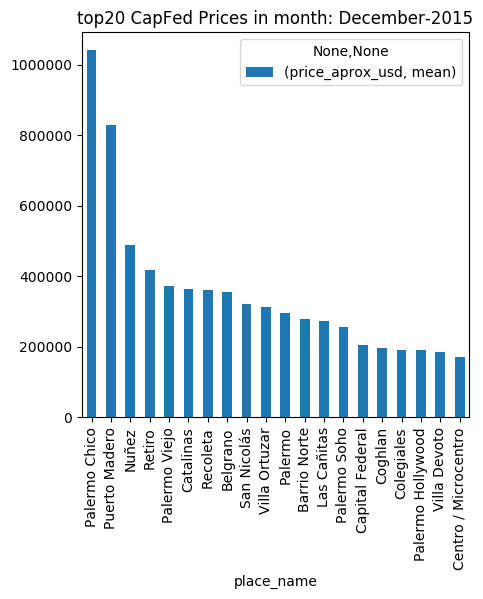

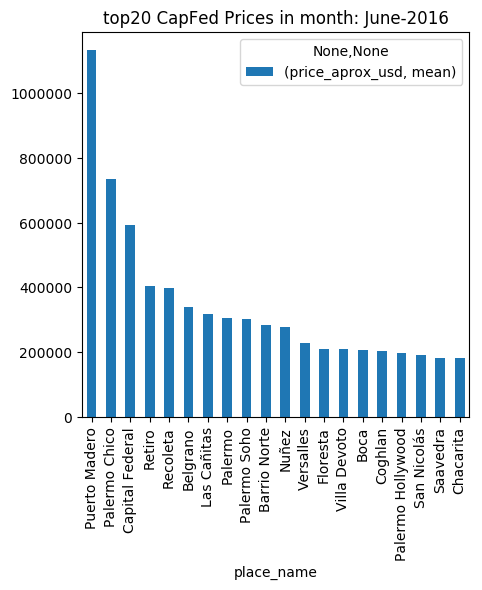

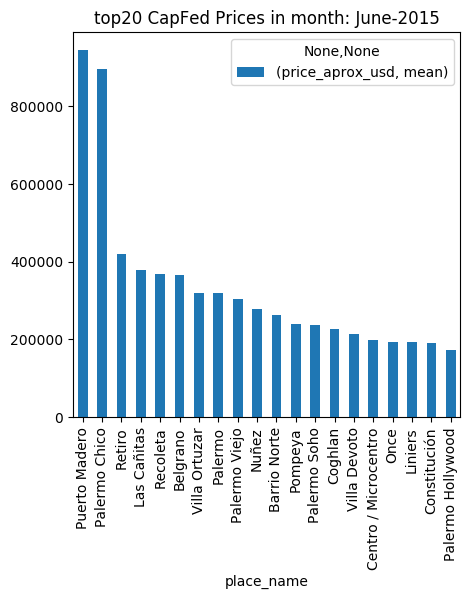

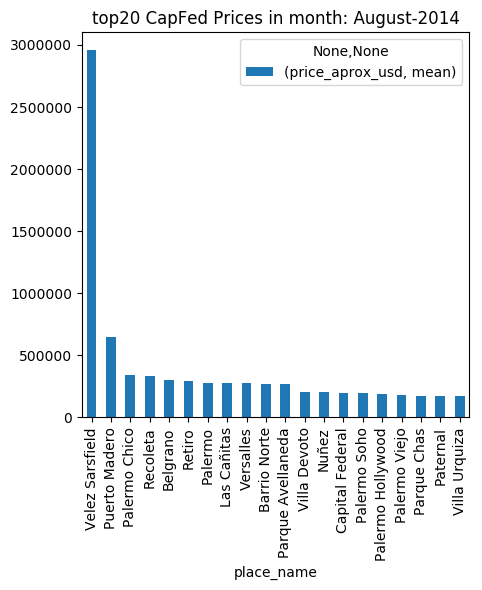

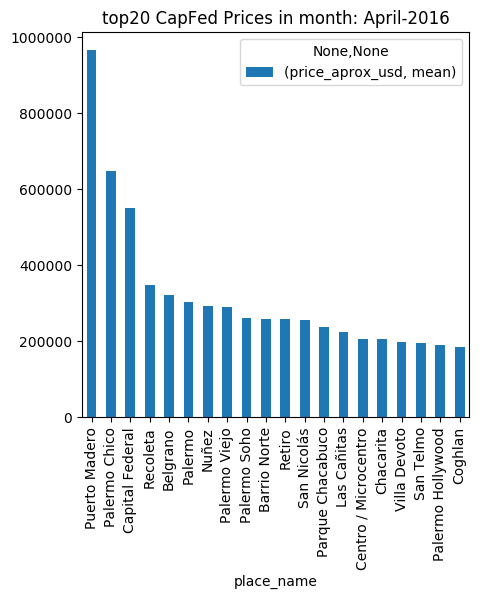

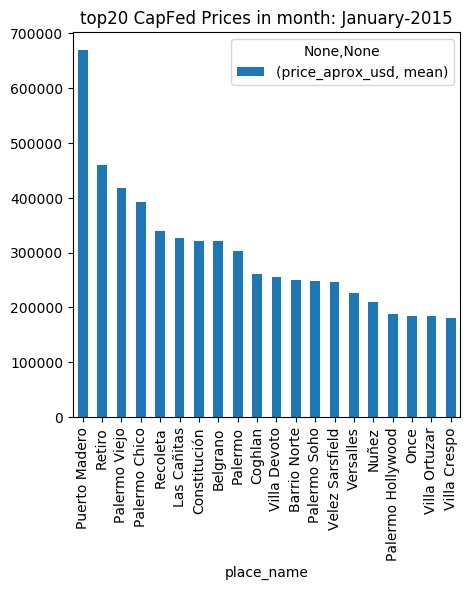

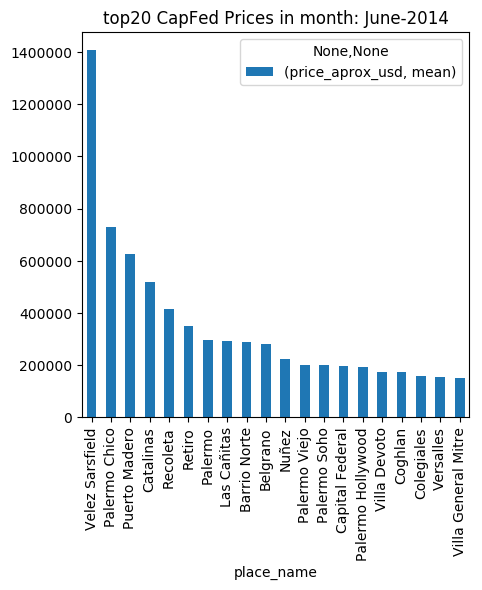

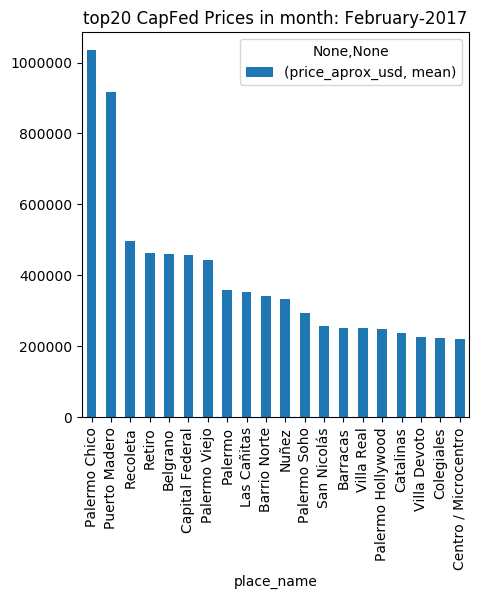

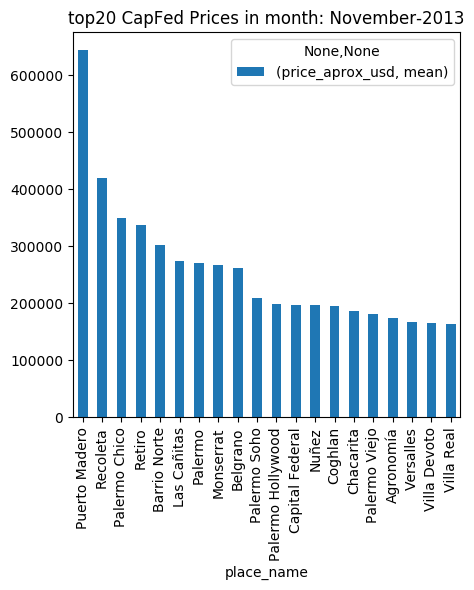

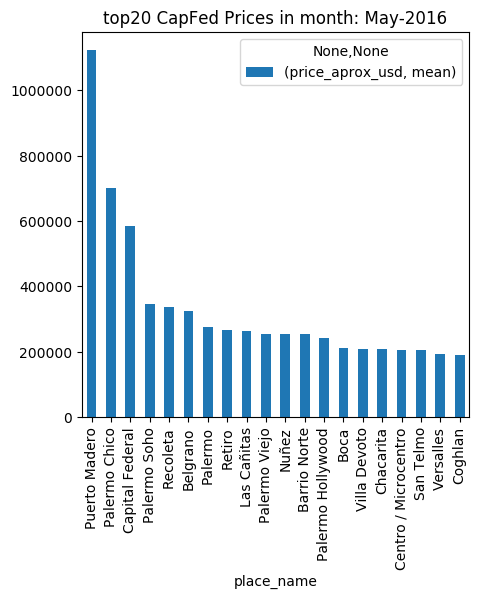

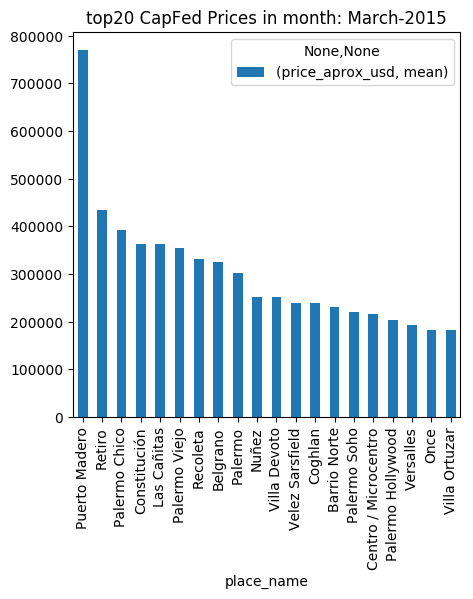

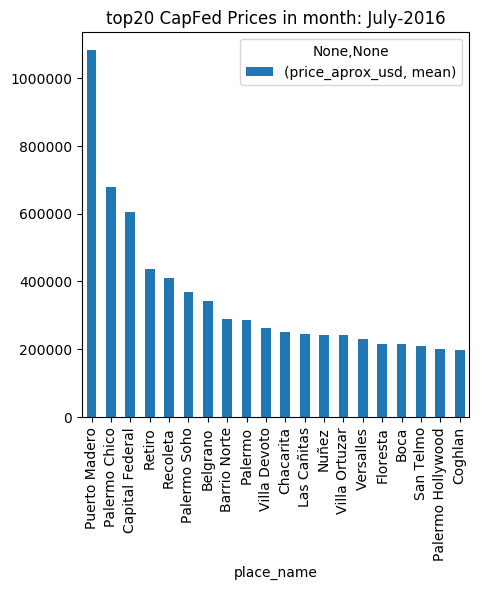

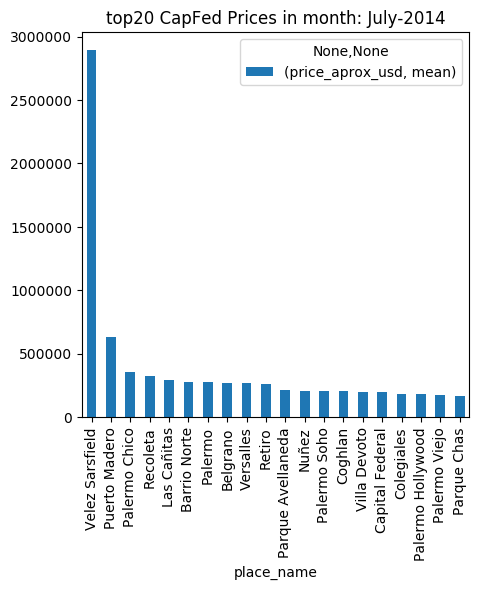

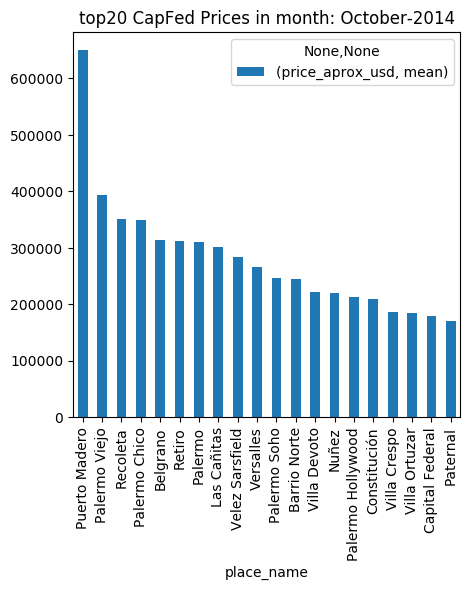

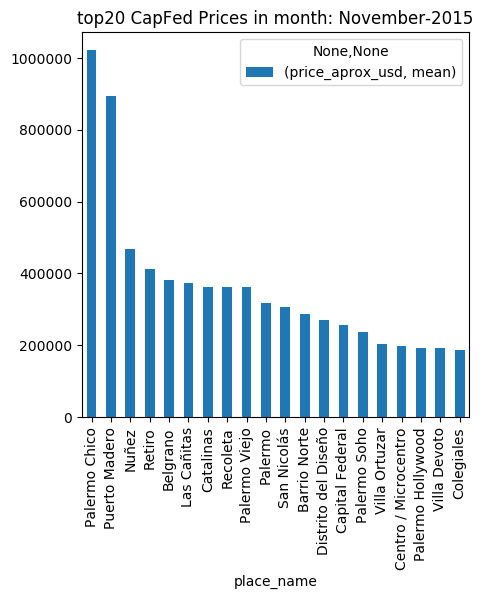

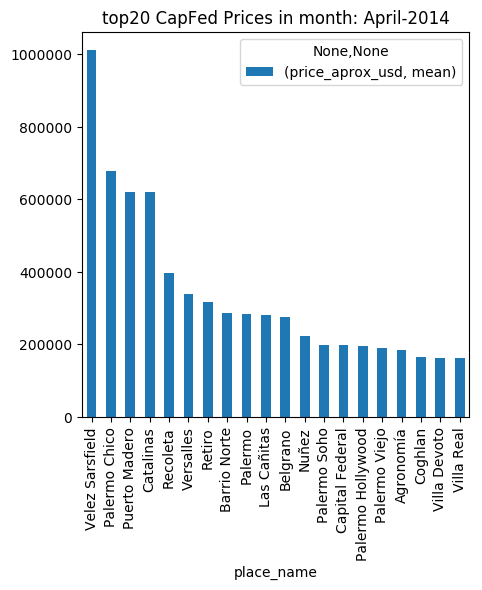

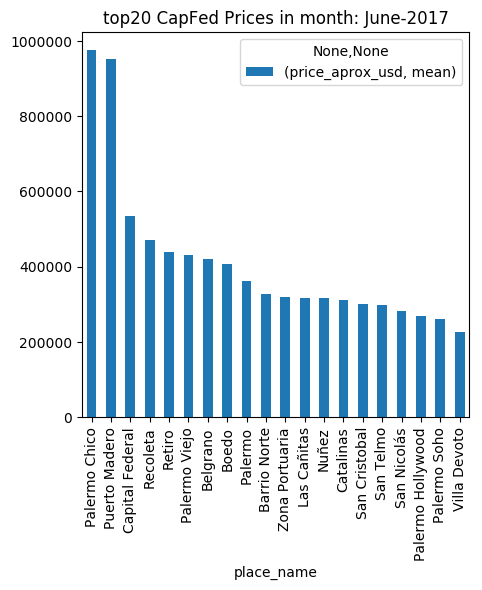

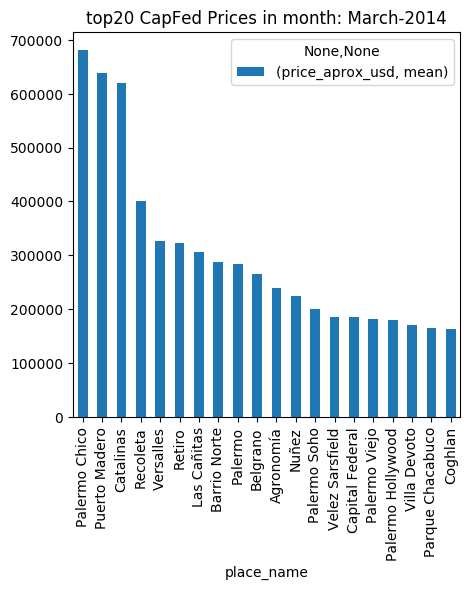

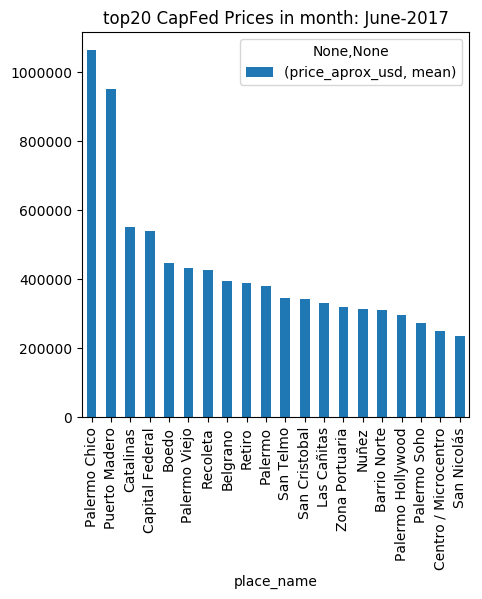

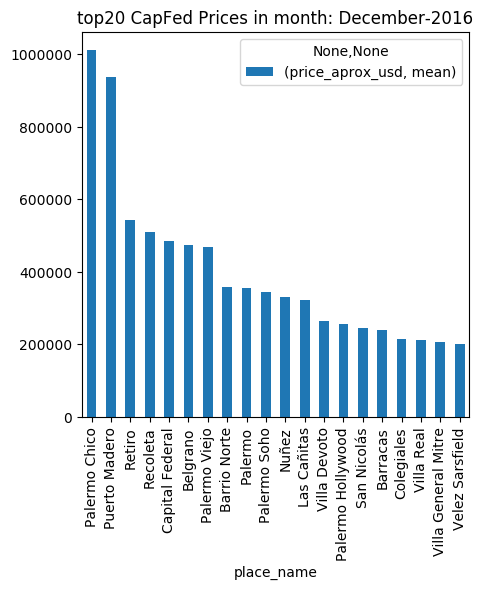

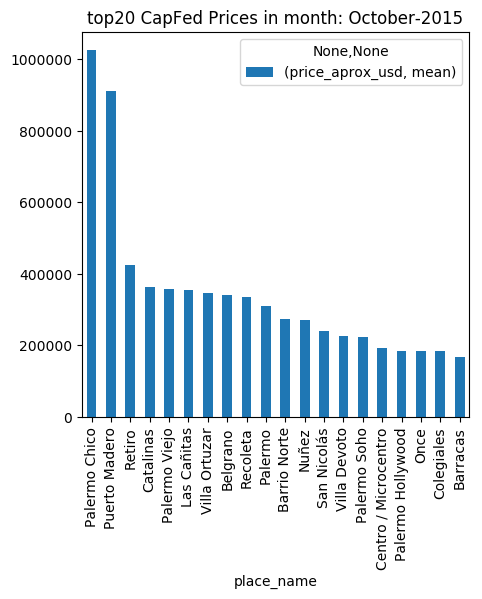

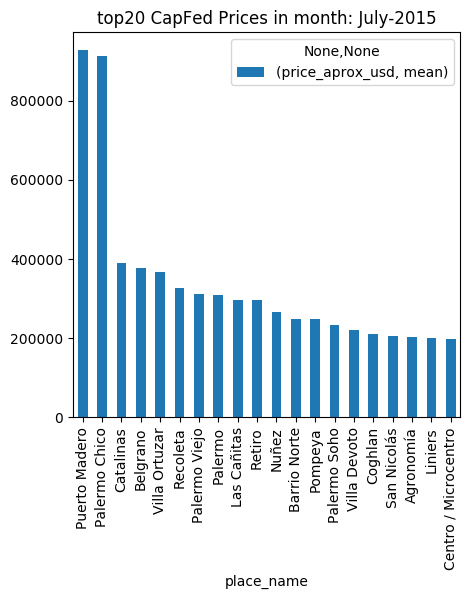

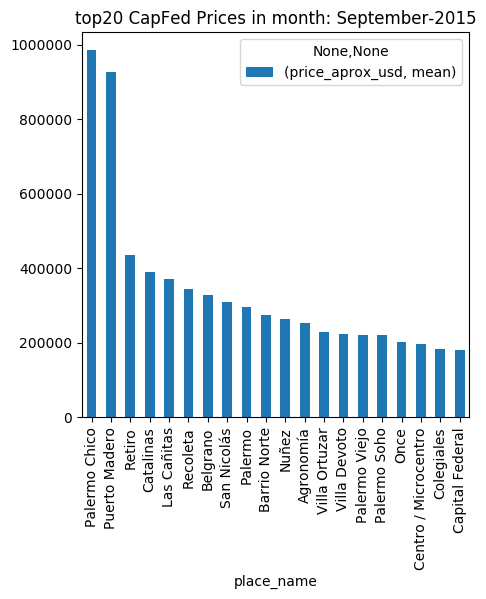

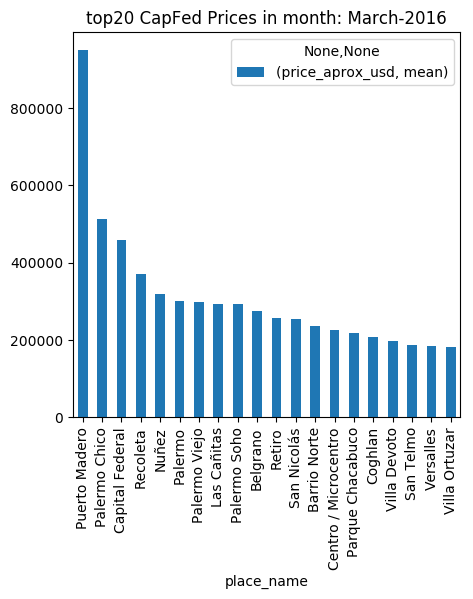

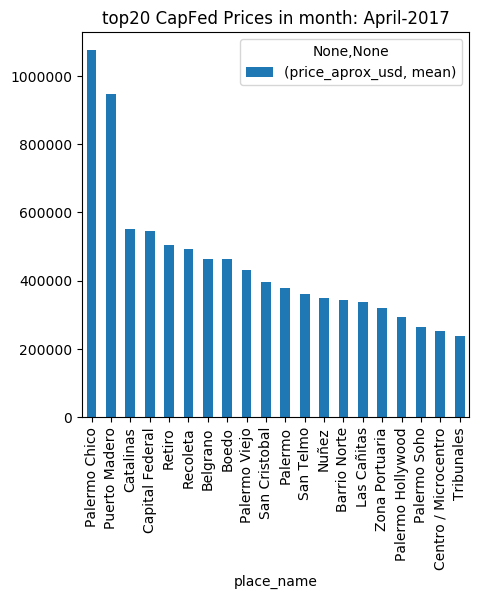

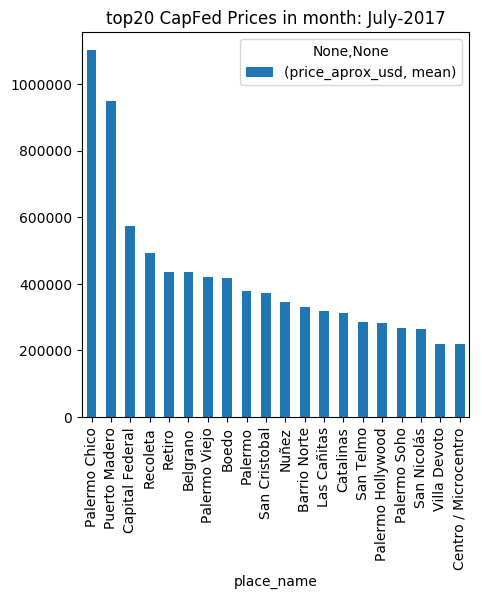

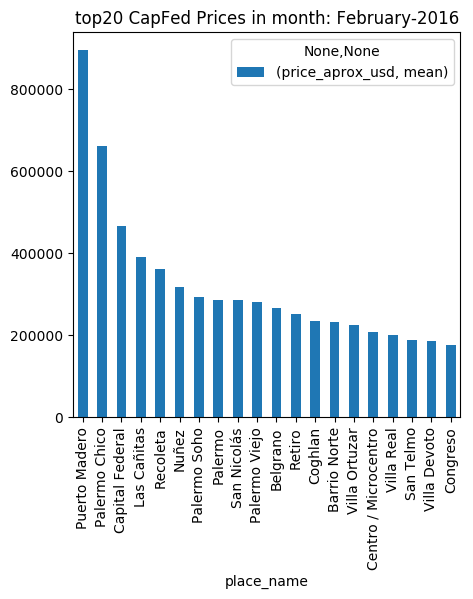

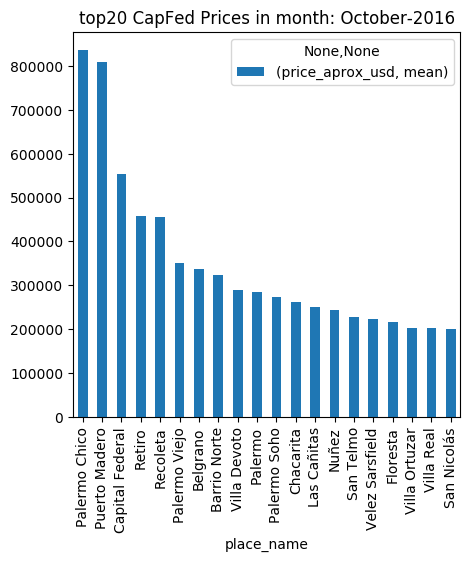

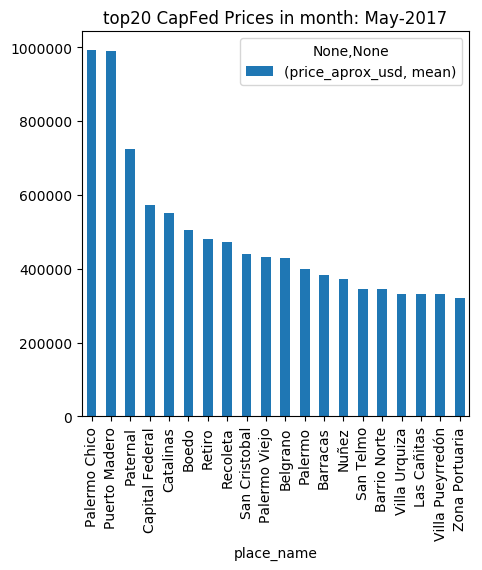

In [11]:
aux = []
for df in properties:
    CF = df.loc[df.place_with_parent_names.str.contains('Capital Federal'), :]
    CF = CF.loc[:, ['price_aprox_usd', 'place_name']].groupby('place_name').agg([np.mean, np.size]).reset_index()
    CF = CF.sort_values(by=('price_aprox_usd', 'mean'), ascending=False).head(20)
    date  = calendar.month_name[df['date'].dt.month.tolist()[0]] + '-' + str(df['date'].dt.year.tolist()[0])
    CF.plot(x='place_name', y=('price_aprox_usd', 'mean') , kind='bar', title="top20 CapFed Prices in month: "+date)

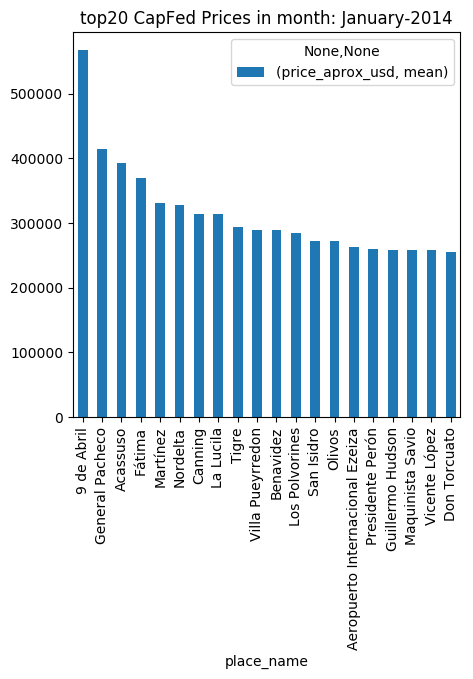

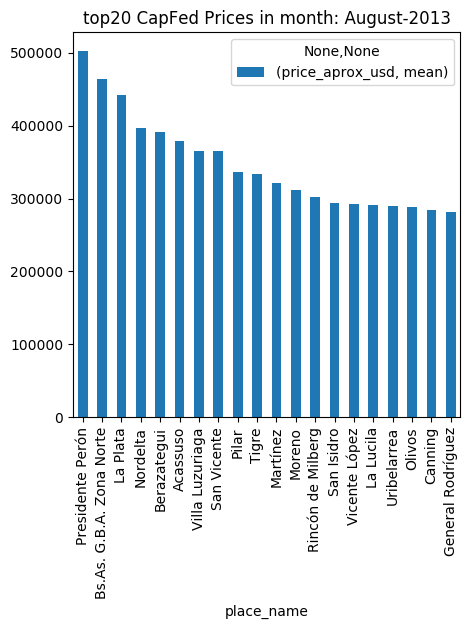

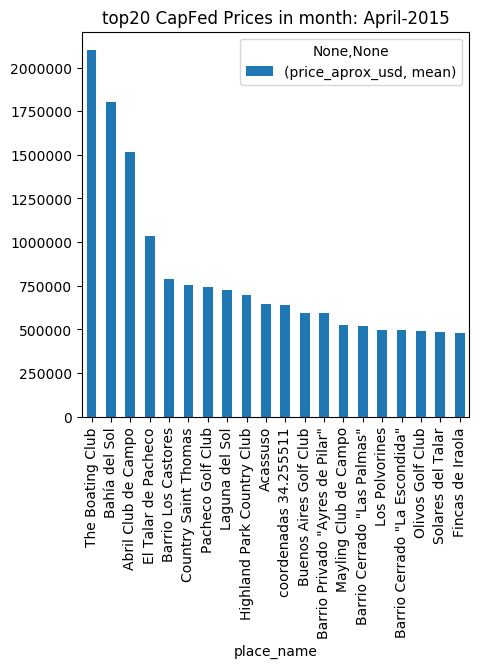

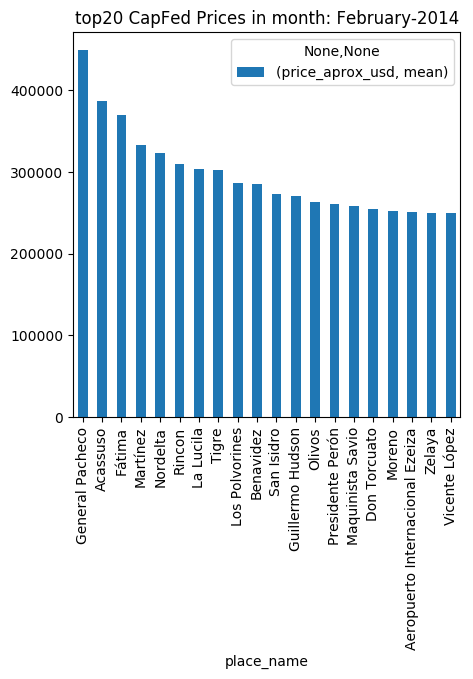

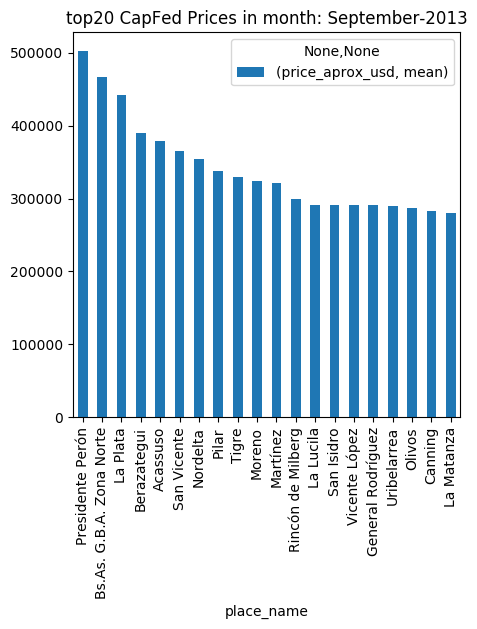

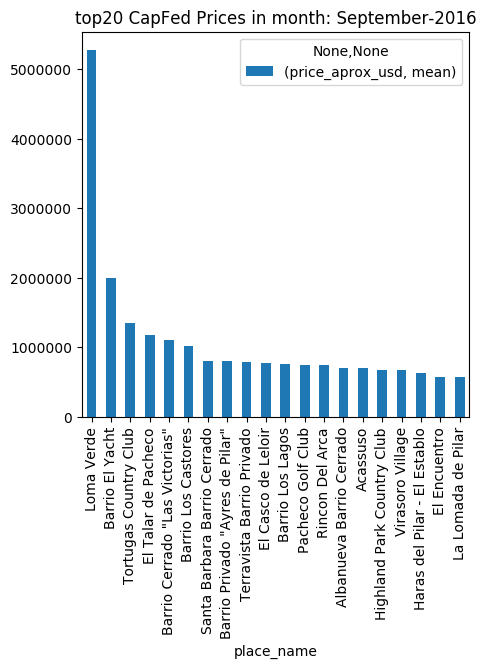

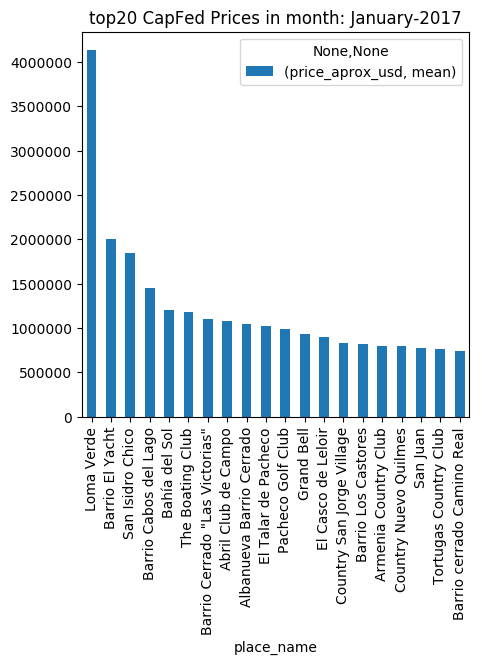

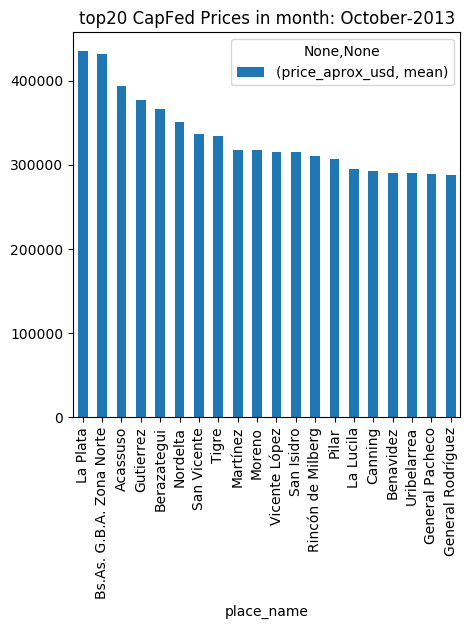

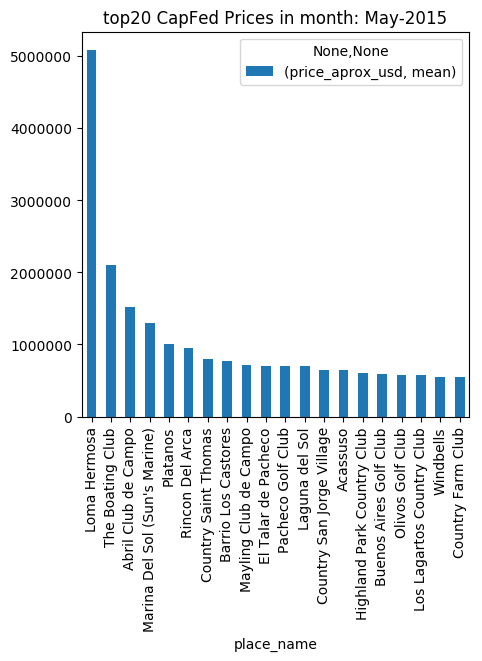

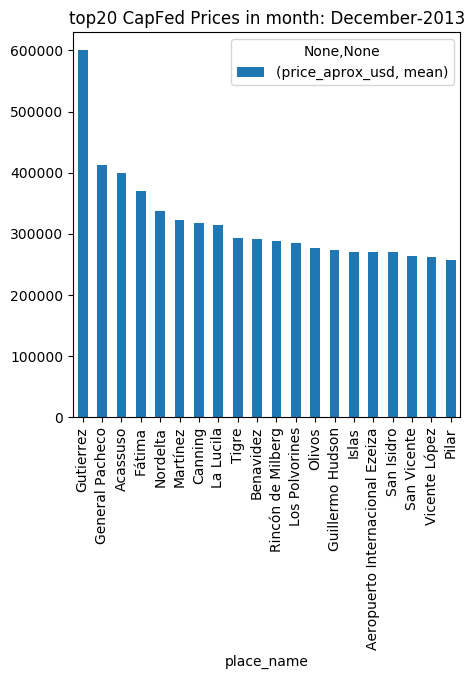

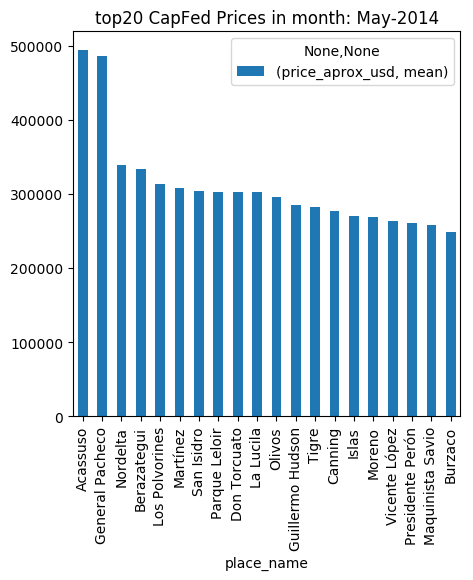

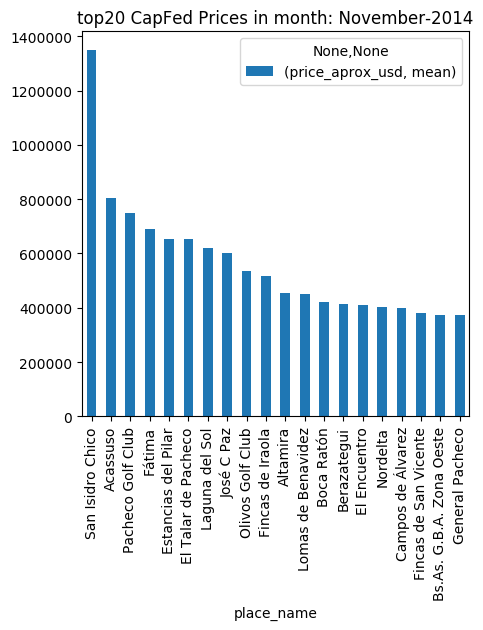

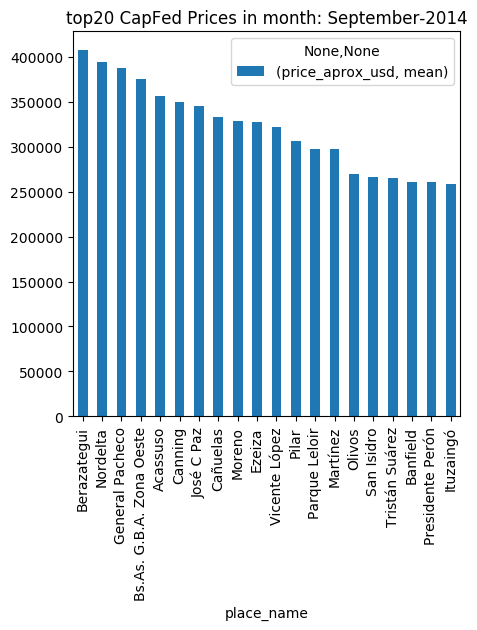

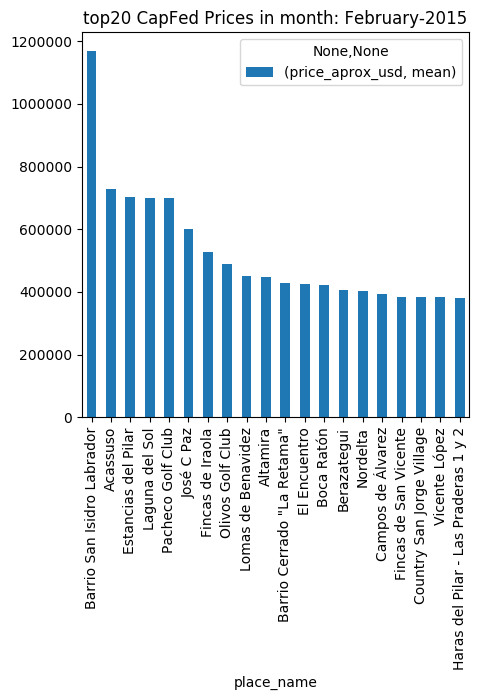

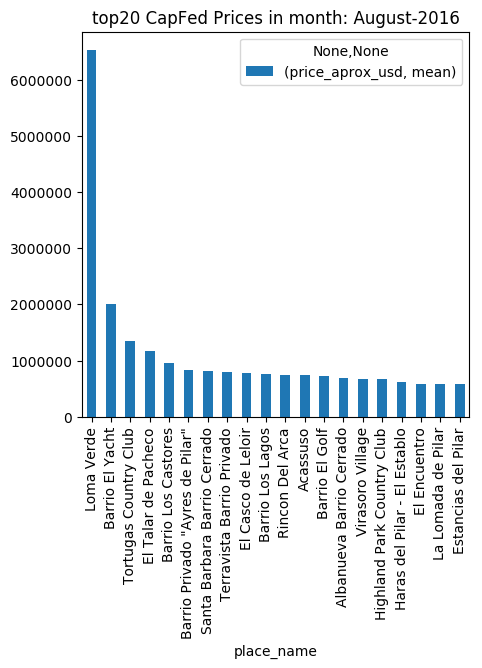

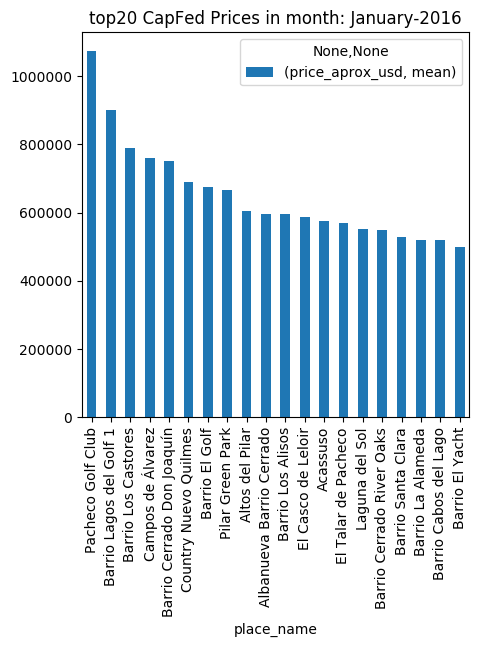

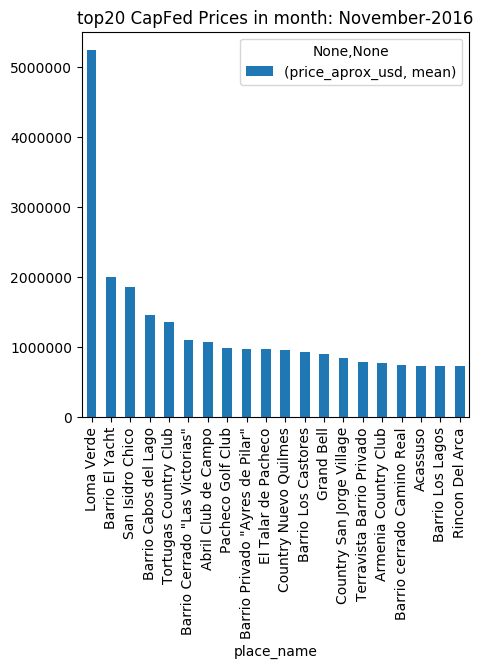

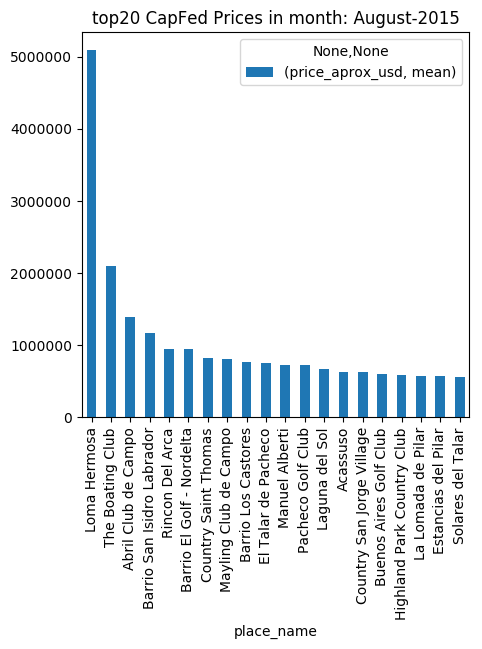

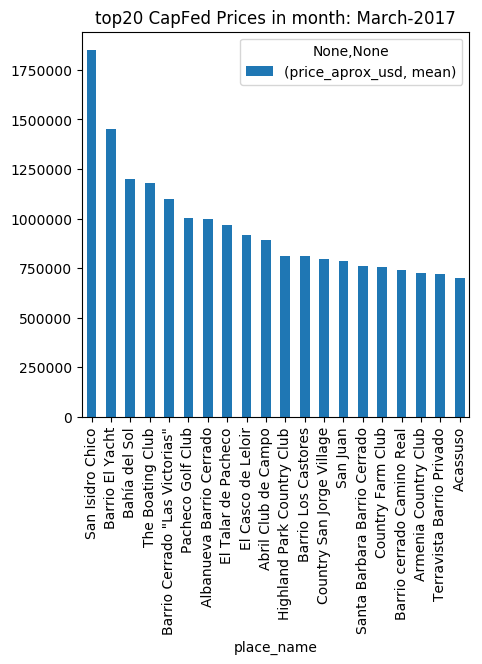

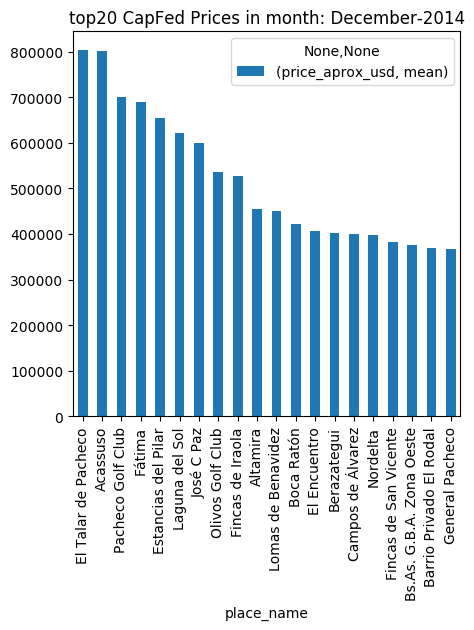

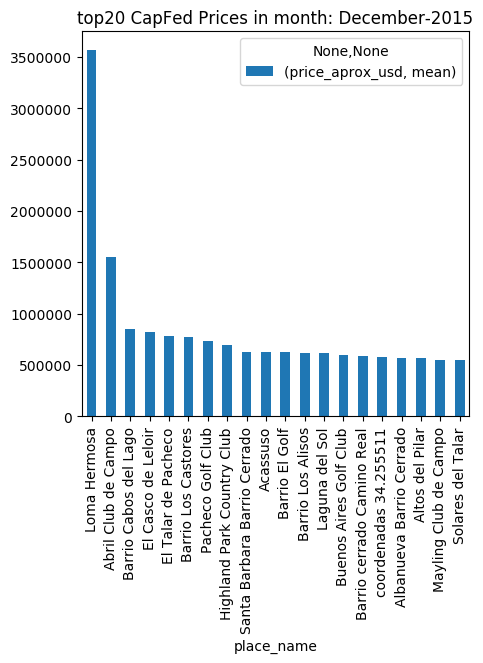

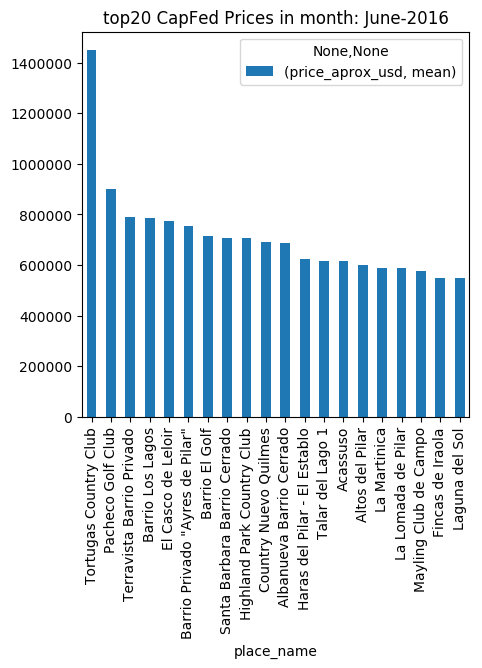

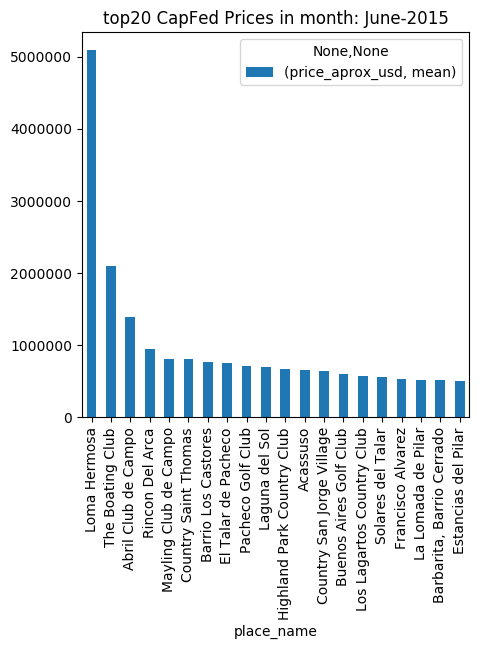

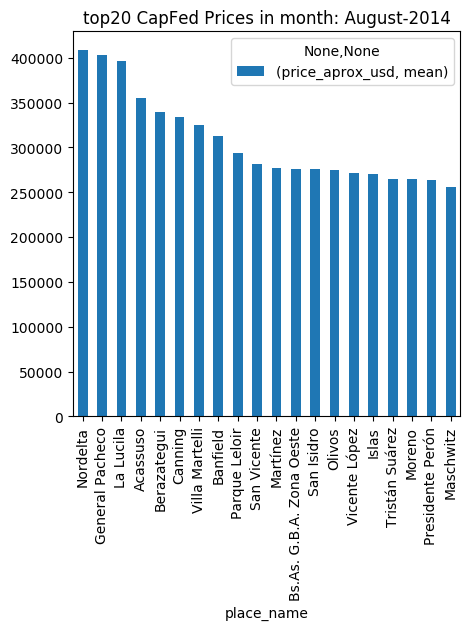

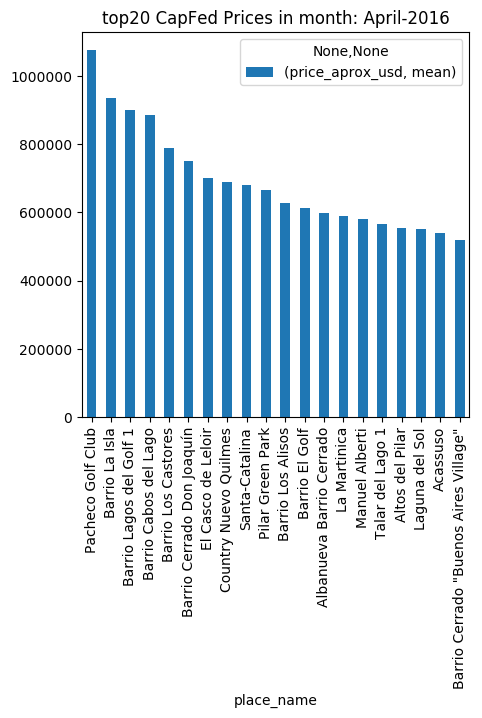

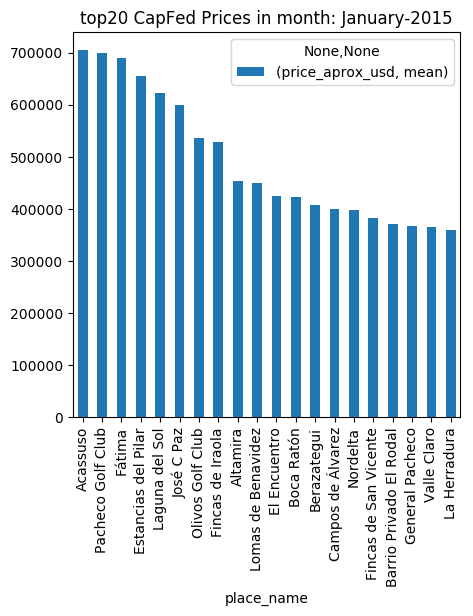

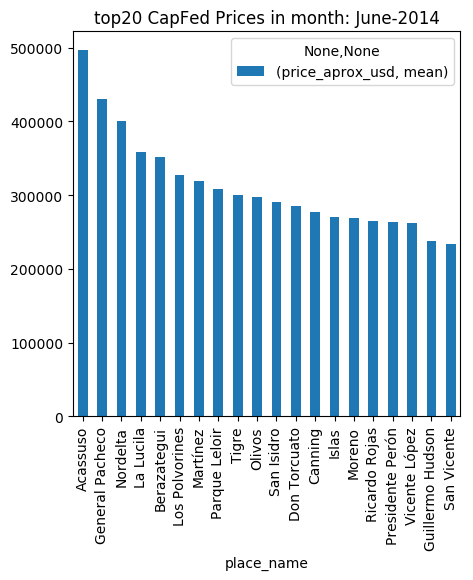

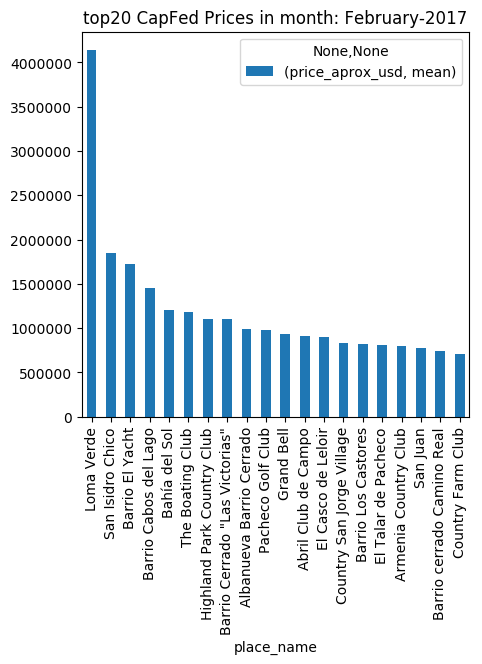

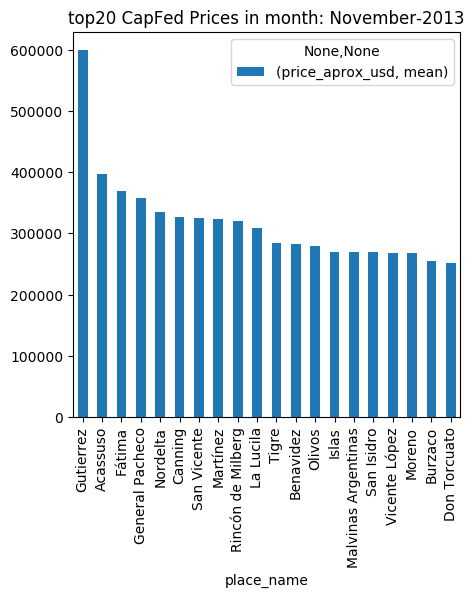

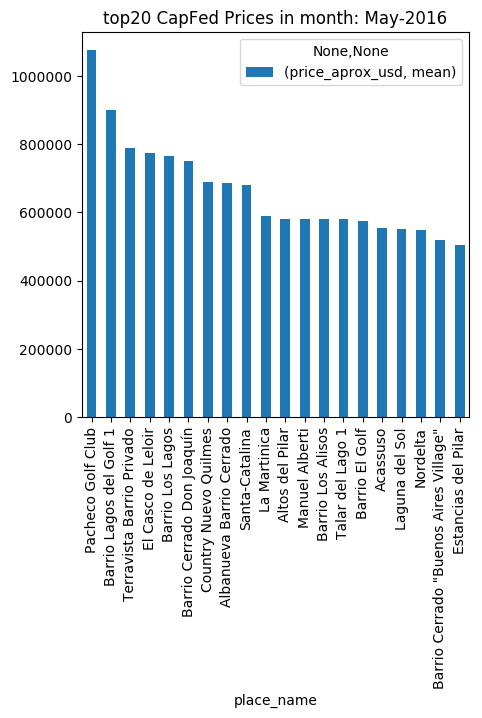

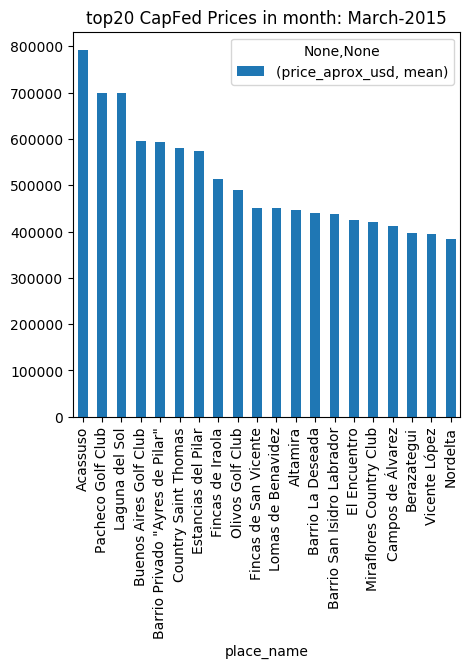

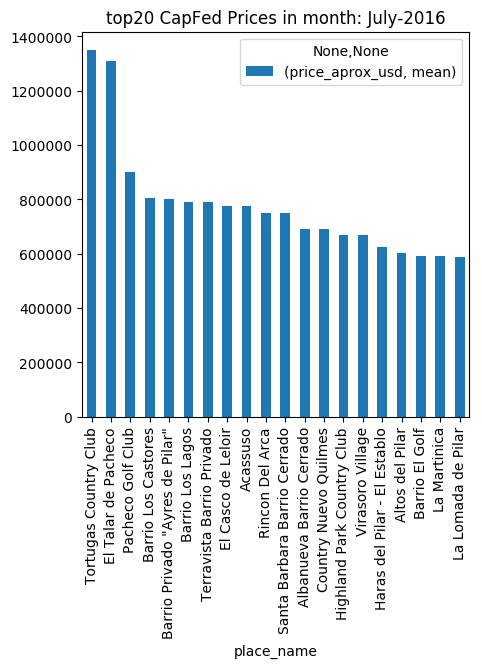

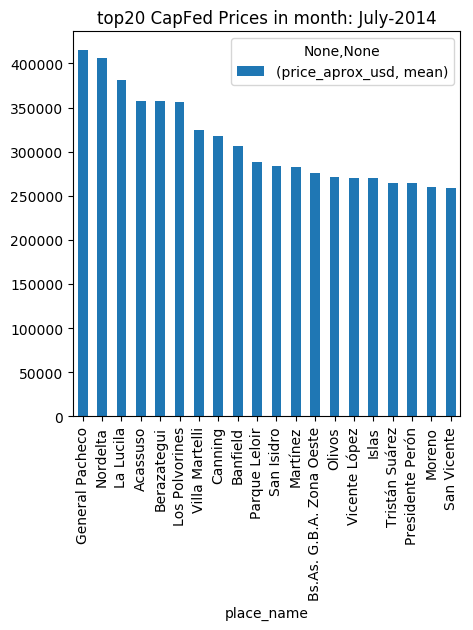

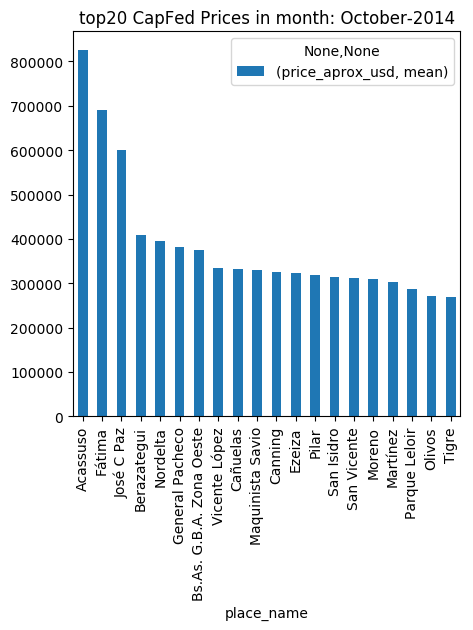

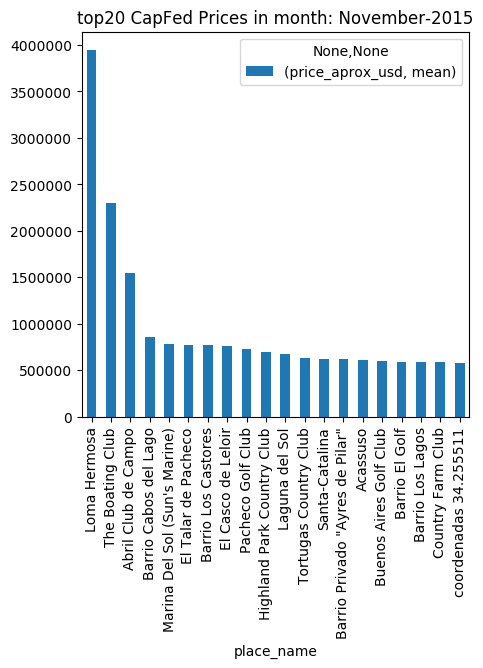

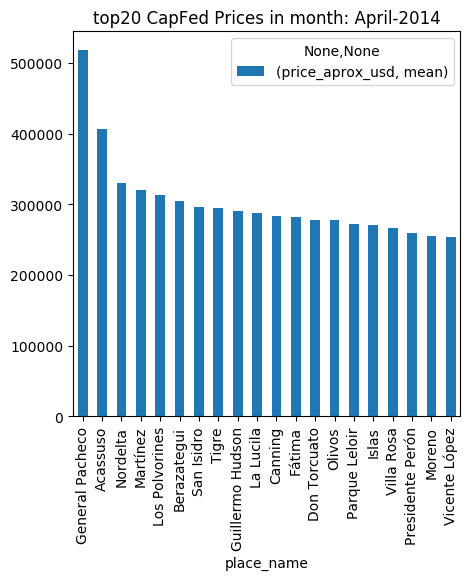

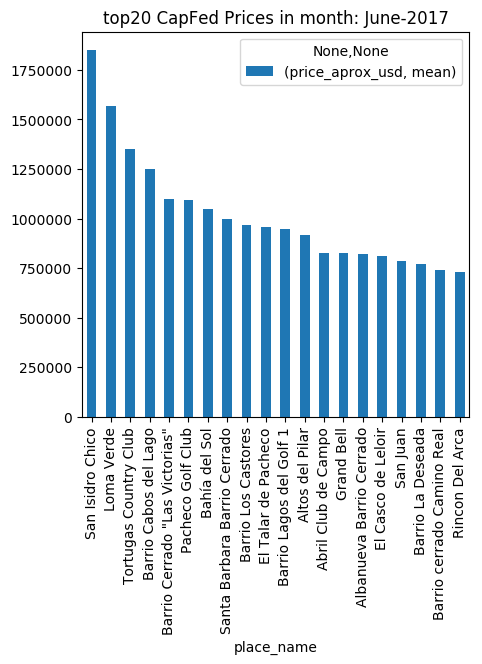

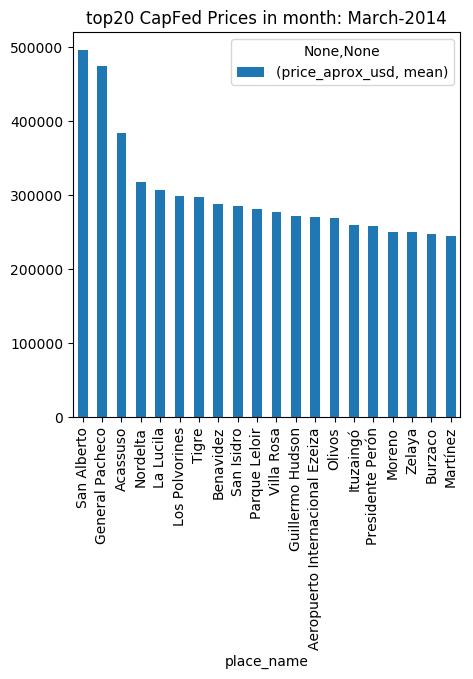

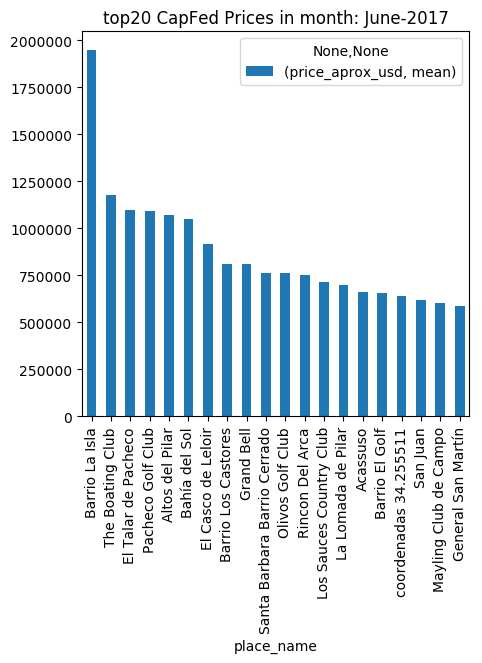

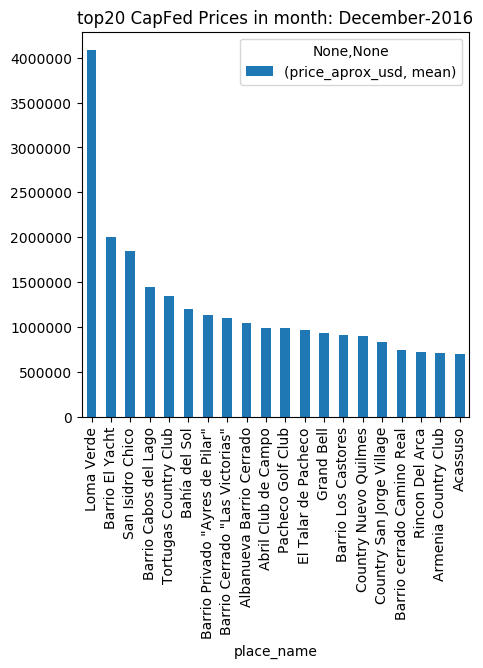

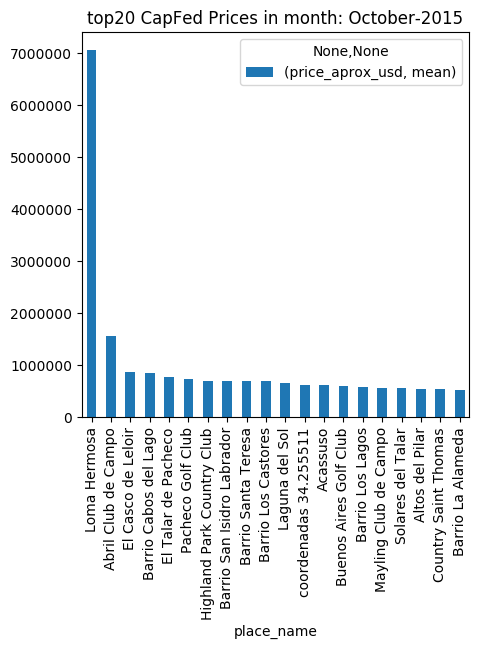

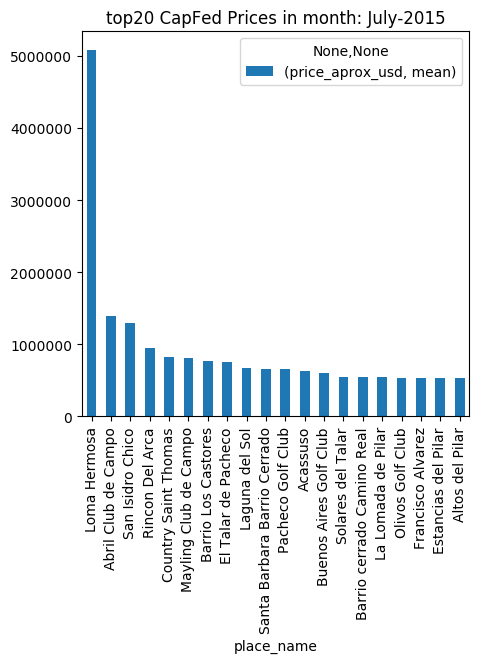

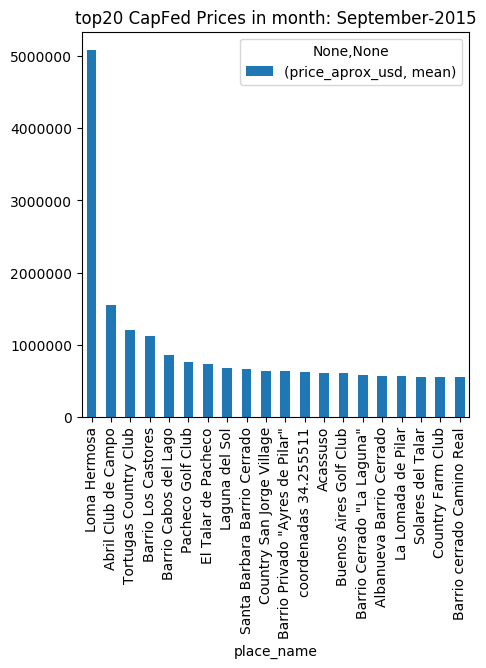

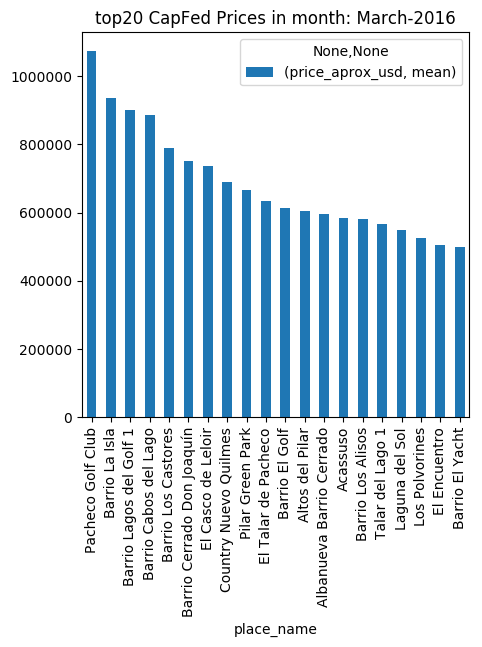

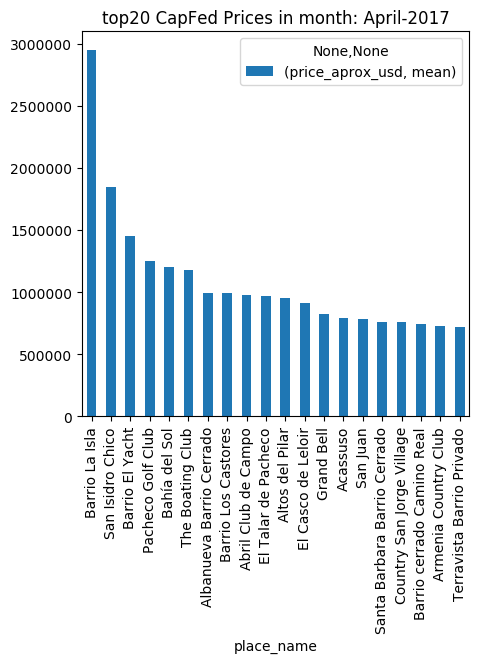

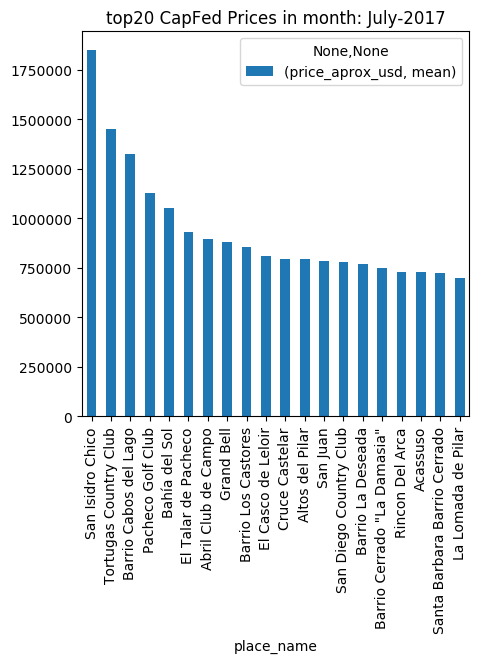

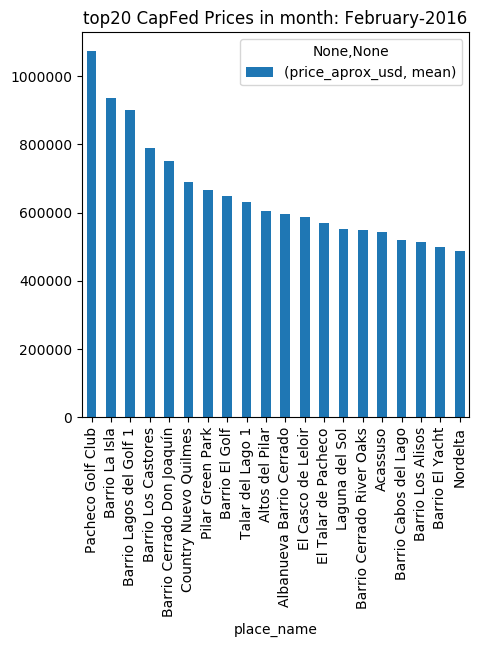

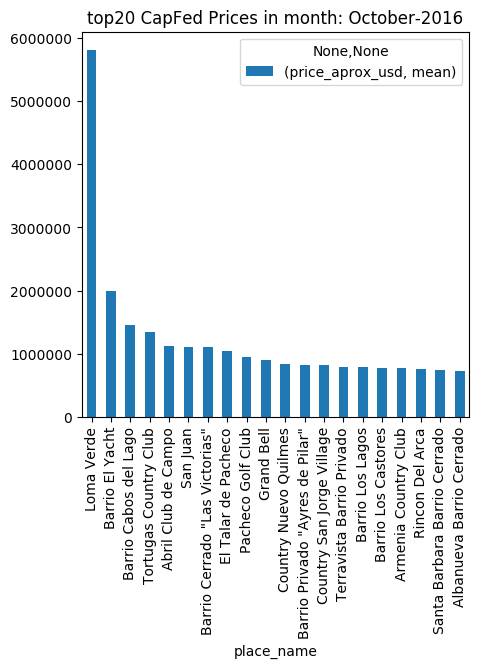

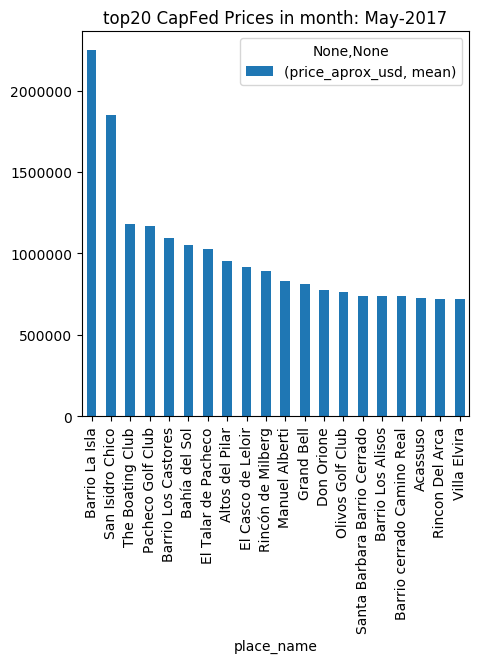

In [12]:
for df in properties:
    GBA = df.loc[df.place_with_parent_names.str.contains('Bs.As. G.B.A.'), :]
    GBA = GBA.loc[:, ['price_aprox_usd', 'place_name']].groupby('place_name').agg([np.mean, np.size]).reset_index()
    GBA = GBA.sort_values(by=('price_aprox_usd', 'mean'), ascending=False).head(20)
    date  = calendar.month_name[df['date'].dt.month.tolist()[0]] + '-' + str(df['date'].dt.year.tolist()[0])
    GBA.plot(x='place_name', y=('price_aprox_usd', 'mean') , kind='bar', title="top20 CapFed Prices in month: "+date)